<a href="https://colab.research.google.com/github/mdivk/colab/blob/master/Stackoverflow_data_analytics_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!python --version

Python 3.6.9


In [4]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
%load_ext google.colab.data_table

In [7]:
%%bigquery --project welynx
SELECT 
  COUNT(*) as total_rows
FROM `bigquery-public-data.stackoverflow.users`

,total_rows
0,11376305


In [0]:
project = 'welynx'

In [0]:
from google.cloud import bigquery


In [0]:
client = bigquery.Client(project=project)

In [0]:
sample_count = 2000

In [0]:
q = "SELECT COUNT(*) as total FROM `bigquery-public-data.stackoverflow.users`"

In [0]:
row_count = client.query(q).to_dataframe().total[0]

In [16]:
row_count

11376305

In [0]:
q_sample = "SELECT * FROM `bigquery-public-data.stackoverflow.users` WHERE RAND() < %d/%d"

In [0]:
df = client.query(q_sample % (sample_count, row_count)).to_dataframe()

In [20]:
df.describe()

,id,reputation,up_votes,down_votes,views
count,1.888000e+03,1888.000000,1888.000000,1888.000000,1888.000000
mean,6.499522e+06,150.879237,14.309322,0.895657,18.611758
std,3.519771e+06,1757.876040,128.459594,13.273537,235.257730
min,1.911000e+03,1.000000,0.000000,0.000000,0.000000
25%,3.489734e+06,1.000000,0.000000,0.000000,0.000000
50%,6.539984e+06,1.000000,0.000000,0.000000,0.000000
75%,9.599691e+06,11.000000,0.000000,0.000000,3.000000
max,1.246197e+07,49757.000000,3391.000000,352.000000,7101.000000


In [21]:
df.head(10)

,id,display_name,about_me,age,creation_date,last_access_date,location,reputation,up_votes,down_votes,views,profile_image_url,website_url
0,318488,Simon Hibbs,<p>Application Support Engineer in the financi...,None,2010-04-16 12:46:12.487000+00:00,2019-11-28 12:33:53.727000+00:00,"London, United Kingdom",4571,212,15,267,None,None
1,1801810,user1801810,None,None,2012-11-06 02:08:02.850000+00:00,2019-11-22 05:37:15.393000+00:00,None,547,104,11,58,None,None
2,5782587,greentea,None,None,2016-01-13 06:17:07.933000+00:00,2016-01-29 07:09:13.403000+00:00,None,15,0,0,27,https://www.gravatar.com/avatar/d6e131fe9db484...,None
3,8280054,Tricker Macedonia,None,None,2017-07-09 17:39:32.320000+00:00,2019-07-05 14:45:44.493000+00:00,Germany,67,3,0,17,https://www.gravatar.com/avatar/5a02b19f0eae60...,None
4,205282,Ali,None,None,2009-11-06 21:58:03.247000+00:00,2019-11-26 02:42:00.737000+00:00,"Hartford, CT",99,15,0,28,None,None
5,816203,davidjmcclelland,<p>I develop an online IDE for building Intern...,None,2011-06-26 14:22:59.817000+00:00,2019-11-26 18:17:28.443000+00:00,"Victor, NY 14564, United States",209,691,5,105,None,http://davidjmcclelland.com
6,912029,xfoguet,None,None,2011-08-25 12:11:49.243000+00:00,2019-11-18 06:41:23.243000+00:00,None,85,7,0,15,None,None
7,4741029,Java Learing,None,None,2015-04-02 05:28:15.107000+00:00,2019-07-19 15:51:46.067000+00:00,None,221,13,0,106,https://www.gravatar.com/avatar/bca069c81785e7...,None
8,4686928,Joseph Gagliardo,None,None,2015-03-18 19:23:26.980000+00:00,2016-03-01 08:09:17.067000+00:00,None,643,0,0,41,https://www.gravatar.com/avatar/2d0623ff426e92...,None
9,580248,Fbarisio,None,None,2011-01-18 16:37:24.790000+00:00,2014-02-26 19:19:07.283000+00:00,None,53,0,0,15,None,None


Let's sort the dataset and see what we get, it turns out the highest reputation is 49757 only, the reason is this dataset has a very heavy left side records because majority of records have a reputation value less than mean

In [24]:
df.sort_values('reputation', ascending=False).head(10)[['id', 'display_name', 'creation_date', 'last_access_date', 'location', 'reputation']]

,id,display_name,creation_date,last_access_date,location,reputation
1439,200936,Christopher Painter,2009-11-02 12:48:03.807000+00:00,2019-11-23 05:13:56.823000+00:00,"Austin, TX",49757
514,343340,DrummerB,2010-05-17 18:29:50.650000+00:00,2019-11-28 15:09:41.093000+00:00,None,37443
1420,42126,kdgregory,2008-12-01 13:21:55.317000+00:00,2019-11-14 12:32:29.550000+00:00,None,34389
30,106797,Catskul,2009-05-14 03:29:44.370000+00:00,2019-11-29 21:31:26.850000+00:00,"Pittsburgh, PA",13795
505,455257,ayush,2010-05-29 22:14:20.267000+00:00,2019-10-03 13:50:54.047000+00:00,"Bangalore, Karnataka, India",12060
973,280490,jd.,2010-02-24 16:21:30.433000+00:00,2018-11-29 12:02:29.200000+00:00,None,8816
979,382982,pdoherty926,2010-07-04 06:58:40.447000+00:00,2019-11-28 04:30:08.943000+00:00,"Brooklyn, NY, United States",8730
511,1931097,Kamran Ahmed,2012-12-27 02:50:57.927000+00:00,2019-11-30 14:06:49.247000+00:00,Dubai - United Arab Emirates,7867
32,1323847,jonathanpberger,2012-04-10 10:51:10.450000+00:00,2013-11-29 19:02:01.720000+00:00,"New York, United States",7572
1429,164142,Neil,2009-08-27 11:27:38.767000+00:00,2019-11-27 15:38:07.140000+00:00,"London, United Kingdom",6761


Using pandas can help easily plot a histogram of the reputation based on the sample data out of 11376305 in total

In [0]:
import pandas as pd

sample_ratio = 0.01

In [28]:
q_bq_full = "SELECT * FROM `bigquery-public-data.stackoverflow.users`"
q_bq_sample = "SELECT * FROM `bigquery-public-data.stackoverflow.users` WHERE RAND() < %d/%d" % (sample_count, row_count)
q_bq_sample

'SELECT * FROM `bigquery-public-data.stackoverflow.users` WHERE RAND() < 2000/11376305'

In [30]:

df = pd.read_gbq(q_bq_sample, project_id=project, dialect='standard')

df.head()

,id,display_name,about_me,age,creation_date,last_access_date,location,reputation,up_votes,down_votes,views,profile_image_url,website_url
0,4385068,Higginslpert,None,None,2014-12-22 11:46:48.033000+00:00,2015-02-12 06:36:21.037000+00:00,None,113,0,0,17,https://www.gravatar.com/avatar/7fac6bc4c38b9a...,None
1,6552444,omid gholami,None,None,2016-07-05 15:34:03.337000+00:00,2019-02-21 13:01:23.230000+00:00,None,87,6,0,18,https://www.gravatar.com/avatar/e6c0ee2a182b6a...,None
2,1563588,Sean Mshan,None,None,2012-07-30 16:47:52.073000+00:00,2015-01-02 10:12:06.383000+00:00,None,57,0,0,17,None,None
3,5681408,kmy,None,None,2015-12-15 09:29:26.337000+00:00,2016-01-12 02:48:43.017000+00:00,None,45,3,0,37,https://www.gravatar.com/avatar/d5eb7e7b45d7c7...,None
4,908958,MJN,<p>Mac and iOS instructor at the University of...,None,2011-08-24 05:35:54.500000+00:00,2019-11-30 05:46:16.283000+00:00,"Seattle, WA",10080,102,4,553,None,http://martinjnash.com


We can further find out from the histogram that the dataset has a very heavy left side on "**reputation**" value, it is also seen from describe() we see the *min, 25%, 50% and 75%*

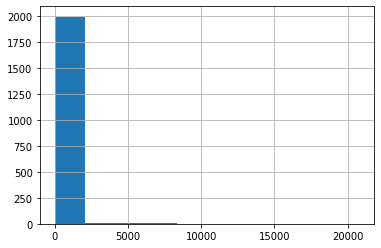

In [34]:
df['reputation'].hist(bins=10)

In [35]:
df.describe()

,id,reputation,up_votes,down_votes,views
count,2.014000e+03,2014.000000,2014.000000,2014.000000,2014.000000
mean,6.480823e+06,100.773088,10.316286,0.405164,11.658888
std,3.463126e+06,820.541656,86.135879,6.008662,92.213657
min,1.152600e+04,1.000000,0.000000,0.000000,0.000000
25%,3.476762e+06,1.000000,0.000000,0.000000,0.000000
50%,6.498795e+06,1.000000,0.000000,0.000000,0.000000
75%,9.453668e+06,11.000000,0.000000,0.000000,3.000000
max,1.242524e+07,20790.000000,1977.000000,240.000000,2294.000000
